In [65]:
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns

In [169]:
def unique_pairs(df, col):
    return pd.concat(
        [df[df.tier_a == col],
         df[df.tier_b == col].rename(
             columns={'tier_a': 'tier_b', 'annot_a': 'annot_b', 'tier_b': 'tier_a',
                      'annot_b': 'annot_a'})])


pairs = pd.read_parquet('/home/t9s9/Documents/Uni/MMC-PR/pairs.parquet')
pairs[['tier_a', 'annot_a']] = pairs.a.str.split('_', expand=True)
pairs[['tier_b', 'annot_b']] = pairs.b.str.split('_', expand=True)
pairs = pairs.drop(columns=['a', 'b', 'start', 'stop', 'exp'])
pairs

,tier_a,annot_a,tier_b,annot_b
0,DStroke,stroke,DApex,a
1,DStroke,stroke,InformationStatus,acc
2,DStroke,stroke,R.G.Right.Phrase,discourse
3,DStroke,stroke,DApex,a
4,DStroke,stroke,InformationStatus,new
...,...,...,...,...
39492,R.G.Right.Phrase,iconic,R.G.Left.Phrase,iconic
39493,R.G.Right.Phrase,deictic,R.G.Left.Phrase,move
39494,R.G.Right.Phrase,iconic-deictic,R.G.Left.Phrase,move
39495,R.G.Right.Phrase,discourse,R.G.Left.Phrase,discourse


# Pitch accent

In [179]:
pairs_pitch = unique_pairs(pairs, 'Pitch accents')
pairs_pitch.annot_a = pairs_pitch.annot_a.replace({'H': 'H*', '!H+': '!H*', 'L*H*': 'L+H*'})
pairs_pitch = pairs_pitch.drop(columns=['tier_a'])
pairs_pitch = pairs_pitch.dropna()
pairs_pitch

,annot_a,tier_b,annot_b
1421,L*,R.G.Right.Phrase,iconic
1422,H*,R.G.Right.Phrase,discourse
1423,!H*,R.G.Right.Phrase,deictic
1424,L+H*,R.G.Right.Phrase,iconic
1425,L+H*,R.G.Left.Phrase,iconic
...,...,...,...
38513,L*,Focus,cf
38515,H*,Focus,nf
38518,L*,Focus,nf
38519,H*,Focus,nf


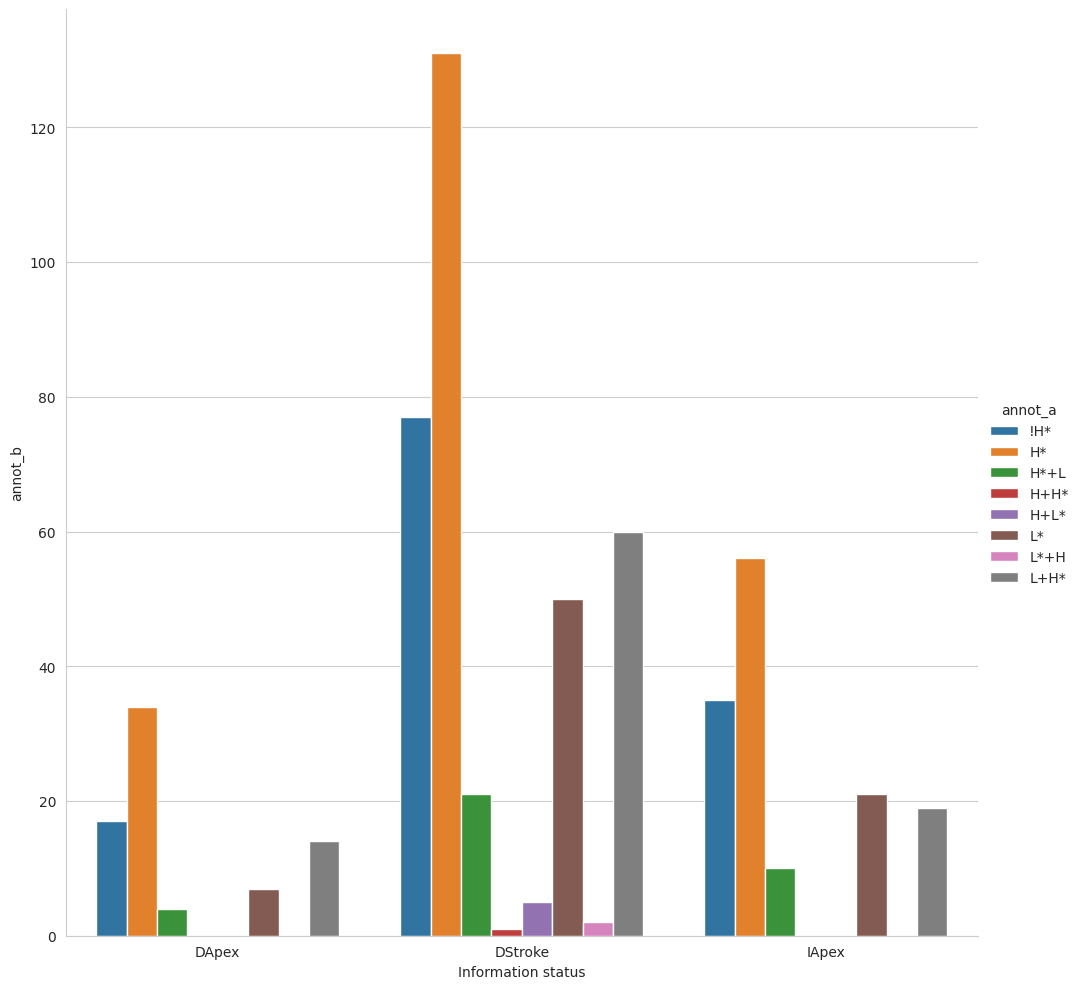

In [189]:
x = pairs_pitch[pairs_pitch.tier_b.isin(['DStroke', 'IApex', 'DApex'])].groupby(
    ['annot_a', 'tier_b']).count().reset_index()
# x['percent'] = x.groupby(['tier_b']).transform(lambda x: x / x.sum())
sns.catplot(x, hue='annot_a', kind='bar', x='tier_b', y='annot_b', height=10).set(xlabel='Information status')

[Text(0.5, 0, 'Pitch accent')]

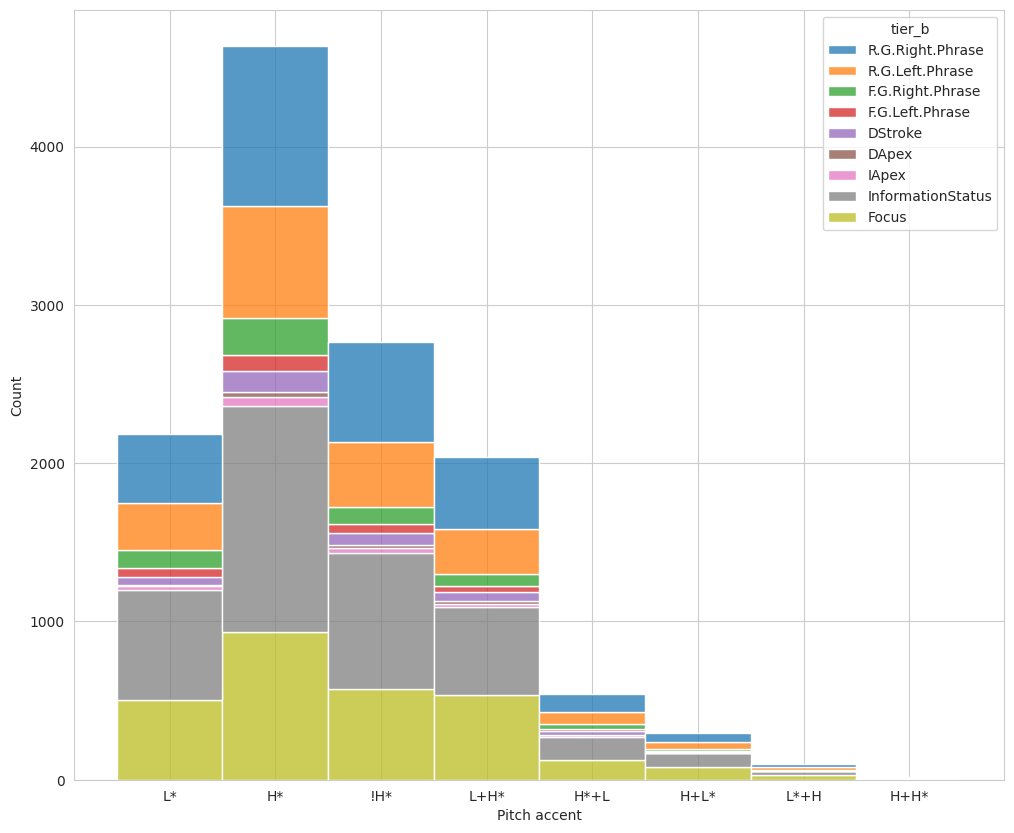

In [167]:
x = pairs_pitch.groupby(['annot_a', 'tier_b']).count().reset_index()
fig, ax = plt.subplots(figsize=(12, 10))
sns.histplot(data=pairs_pitch, x='annot_a', hue='tier_b', stat='count', multiple='stack', ax=ax).set(
    xlabel='Pitch accent')

/tmp/ipykernel_9050/70501346.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  x['percent'] = x.groupby(['annot_b']).transform(lambda x: x / x.sum())


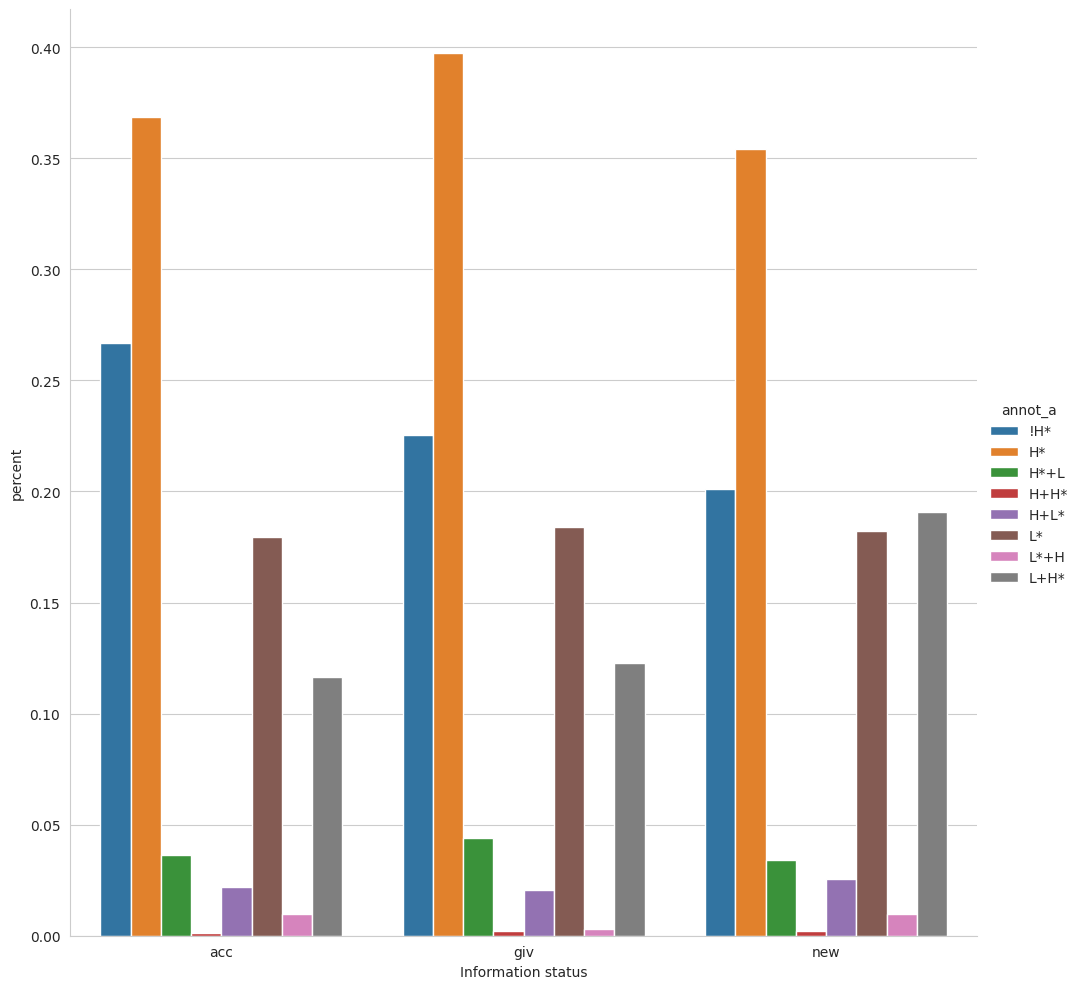

In [165]:
x = pairs_pitch[pairs_pitch.tier_b == 'InformationStatus'].groupby(['annot_a', 'annot_b']).count().reset_index()
x['percent'] = x.groupby(['annot_b']).transform(lambda x: x / x.sum())
sns.catplot(x, hue='annot_a', kind='bar', x='annot_b', y='percent', height=10).set(xlabel='Information status')

/tmp/ipykernel_9050/1492407633.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  x['percent'] = x.groupby(['annot_a']).transform(lambda x: x / x.sum())


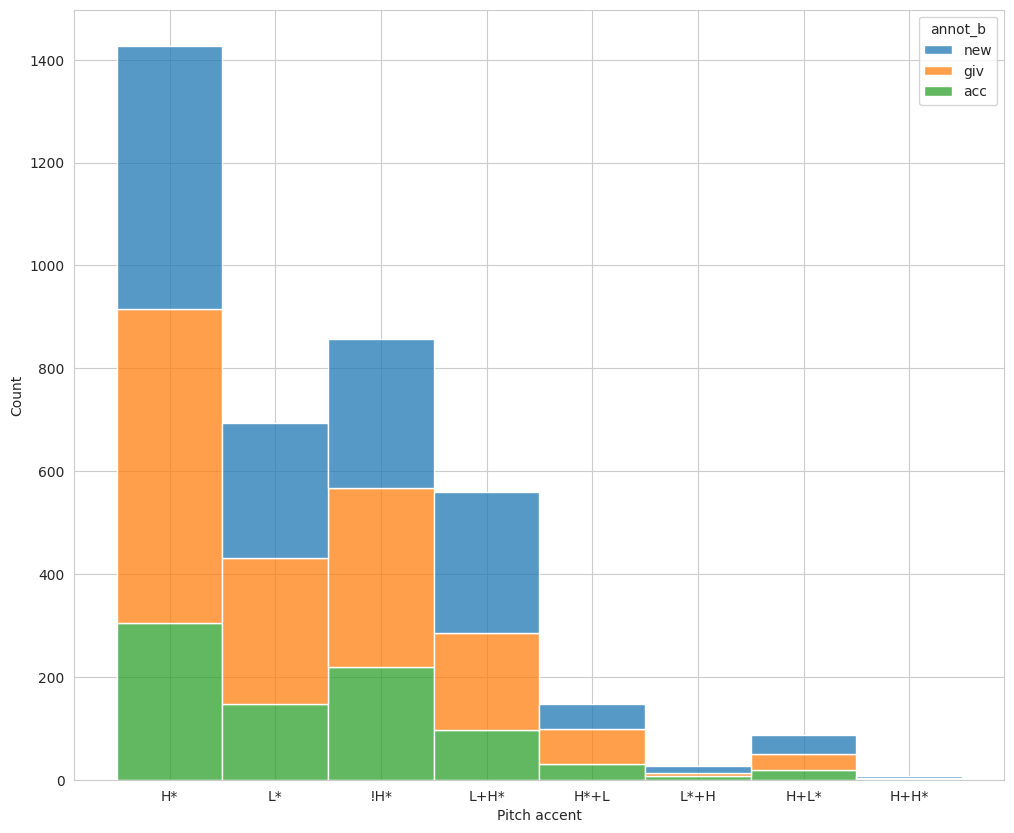

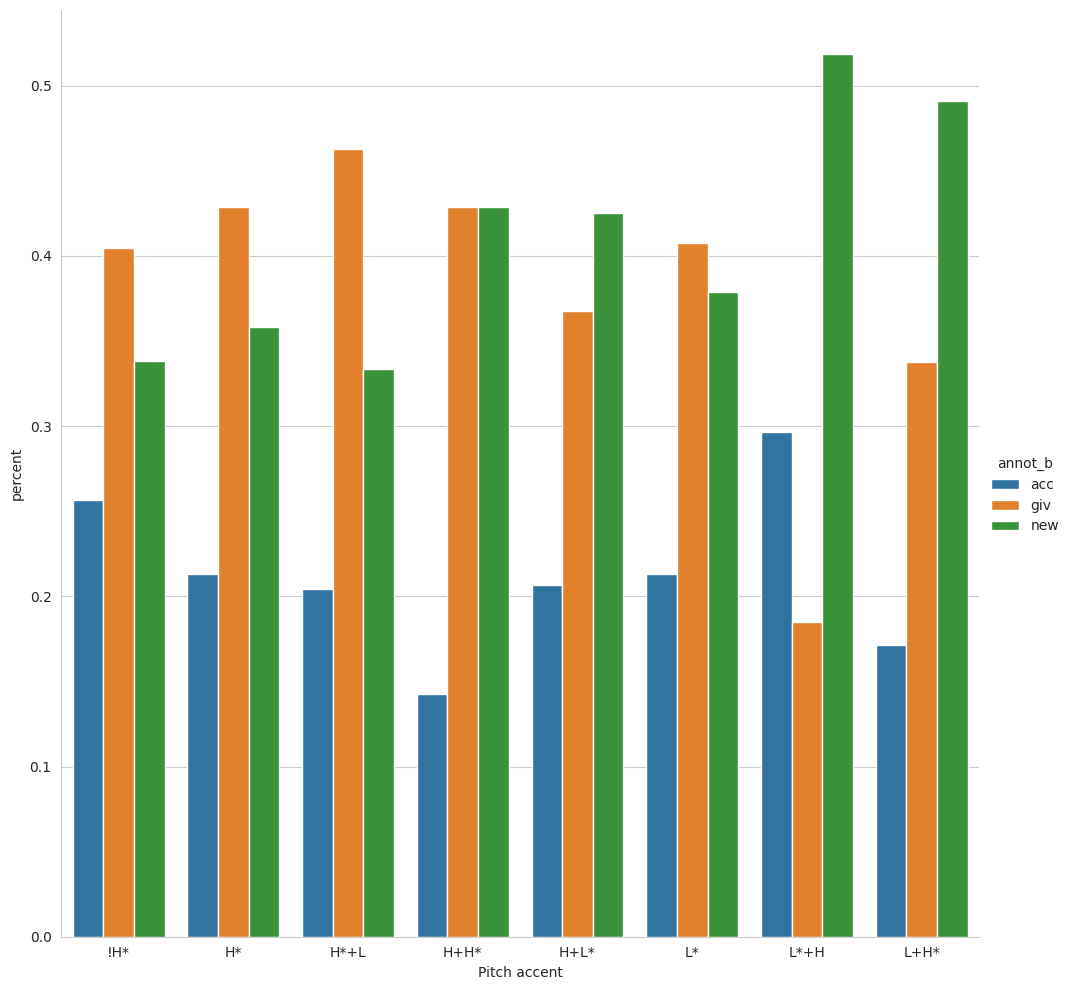

In [166]:
x = pairs_pitch[pairs_pitch.tier_b == 'InformationStatus']
fig, ax = plt.subplots(figsize=(12, 10))
sns.histplot(data=x, x='annot_a', hue='annot_b', stat='count', multiple='stack', ax=ax).set(xlabel='Pitch accent')

x = pairs_pitch[pairs_pitch.tier_b == 'InformationStatus'].groupby(['annot_a', 'annot_b']).count().reset_index()
x['percent'] = x.groupby(['annot_a']).transform(lambda x: x / x.sum())
sns.catplot(x, hue='annot_b', kind='bar', x='annot_a', y='percent', height=10).set(xlabel='Pitch accent')